# Introduction

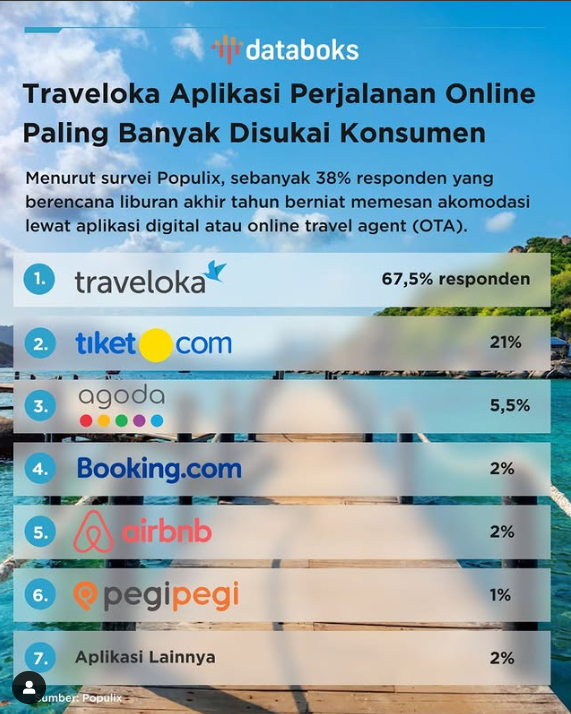

`Fact 1:` A survey by Populix conducted in 2022 shows the dominance of Traveloka as the most preferred online travel application. This presents a unique opportunity for most accommodation providers, including those in Indonesia, to intensify their promotions through the application.

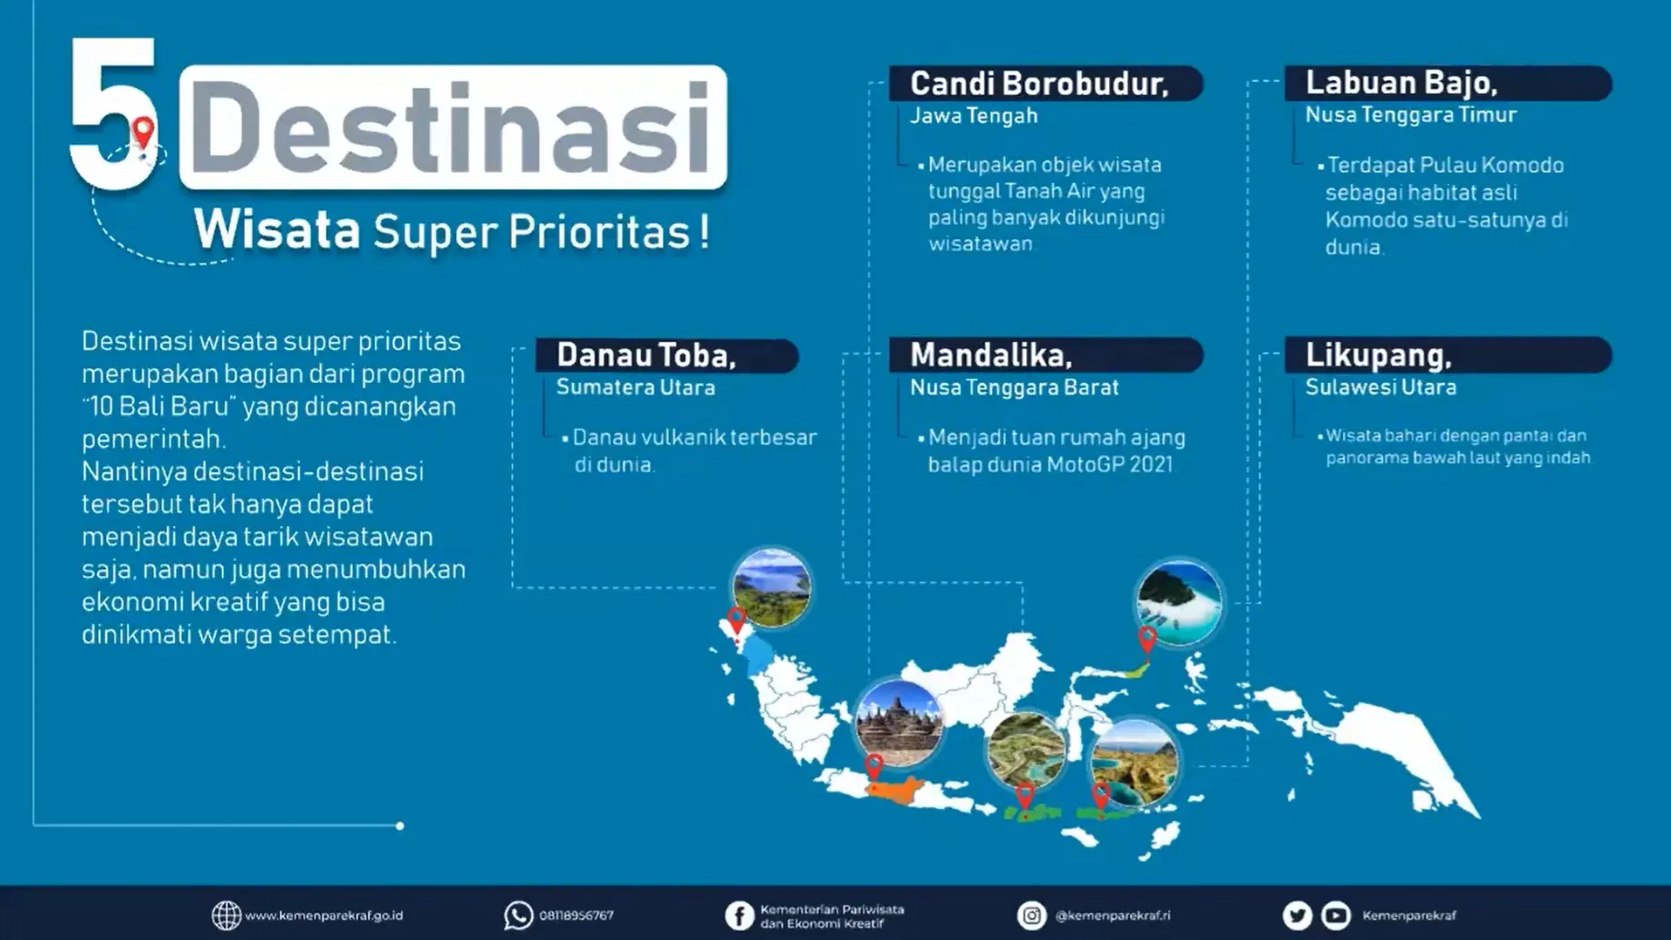

`Fact 2:` Another fact shows that the Ministry of Tourism and Creative Economy has designated NTB as one of the super-priority tourism destination provinces in Indonesia. Of course, all infrastructure and supporting facilities need to be taken into account. One of the most crucial aspects is accommodation.

This data analysis aims to determine the extent of the availability of adequate accommodation information in NTB, especially on Lombok Island as the main island, considering the majority of travelers use Traveloka as a means to find accommodation at tourist destinations (Populix, 2022). In addition, we will also explore the availability of accommodation and how satisfied tourists are with the accommodation on Lombok Island. The benefits of this analysis are certainly to provide a guideline for relevant stakeholders to maximize the provision of accommodation in NTB, especially Lombok Island, as a super-priority tourist area, in terms of facilities, prices, information access, and distribution of accommodation.

Analysis steps:
1. Scraping accommodation data on Lombok Island through the Traveloka website
2. Conducting data cleaning processes to avoid invalid analysis results
3. Storing data in a PostgreSQL database. The benefit is that we will have a reliable, secure, and flexible database system according to our needs. In the future, this will also make it easier for us to access and get a better understanding of the data
4. Performing EDA (this time we will try using PostgreSQL).

# Data Scraping Process

In [ ]:
# install library
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 32.2 MB/s eta 0:00:00


In [ ]:
# import library
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300

In [ ]:
option = webdriver.ChromeOptions()
option.add_argument("--start-maximized")
option.add_argument("--headless")
option.add_argument("--disable-gpu")
option.add_argument("--no-sandbox")
option.add_argument("--remote-debugging-port=9230")

accomodation_type = []
name = []
address = []
price = []
facilities = []
total_review = []
rating = []

driver_hotel = webdriver.Chrome(options=option)
for i in range(1, 48):
    url_hotel = f"https://www.traveloka.com/en-id/hotel/indonesia/city/lombok-107703/{i}"
    driver_hotel.get(url_hotel)
    soup = BeautifulSoup(driver_hotel.page_source, "html.parser")
    div_containers = soup.findAll('div', attrs={'class':"css-1dbjc4n r-14lw9ot r-awg2lu r-1dzdj1l r-rs99b7 r-1loqt21 r-18u37iz r-1udh08x r-1otgn73 r-1i6wzkk r-lrvibr"})

    for container in div_containers:
        review_accomodation_type = container.find('div', attrs={"class":'css-901oao r-1gle5yg r-a5wbuh r-1enofrn r-1kfrs79 r-1cwl3u0 r-fdjqy7', "data-testid":'popular-hotel-accommodation-type'})
        if review_accomodation_type: accomodation_type.append(review_accomodation_type.text.strip())
        else: accomodation_type.append(None)

        review_name = container.find('div', attrs={"class":'css-1dbjc4n r-13awgt0 r-18u37iz'})
        if review_name: name.append(review_name.text.strip())
        else: name.append(None)

        review_address1 = container.find('div', attrs={"class":'css-901oao css-bfa6kz r-1b43r93 r-1w9mtv9 r-1kfrs79 r-rjixqe r-fdjqy7', "data-testid":'popular-hotel-address'})
        review_address2 = container.find('div', attrs={"class":'css-901oao css-bfa6kz r-1w9mtv9 r-1kfrs79 r-rjixqe r-fdjqy7', "data-testid":'popular-hotel-address'})
        review_address = review_address1 or review_address2
        if review_address: address.append(review_address.text.strip())
        else: address.append(None)

        review_price1 = container.find('h2', attrs={"class":'css-4rbku5 css-901oao r-1w9mtv9 r-1kfrs79', "data-testid":'popular-hotel-price'})
        review_price2 = container.find('h2', attrs={"class":'css-4rbku5 css-901oao r-1w9mtv9 r-1kfrs79 r-1ff274t', "data-testid":'popular-hotel-price'})
        review_price = review_price1 or review_price2
        if review_price: price.append(review_price.text.strip())
        else: price.append(None)

        list_facilities = []
        for fac_num in range(0, 7):
          review_facilities1 = container.find('div', attrs={"class":'css-1dbjc4n r-1awozwy r-391gc0 r-sdzlij r-1kbdv8c r-18u37iz r-s1qlax r-1vvnge1', "data-testid":f'hotel-feature-badge-{fac_num}'})
          review_facilities2 = container.find('div', attrs={"class":'css-1dbjc4n r-1awozwy r-sdzlij r-1kbdv8c r-18u37iz r-s1qlax r-1vvnge1', "data-testid":f'hotel-feature-badge-{fac_num}'})
          review_facilities = review_facilities1 or review_facilities2
          if review_facilities: list_facilities.append(review_facilities.text.strip())
        facilities.append(list_facilities)

        review_total_review = container.find('div', attrs={"class":'css-901oao r-a5wbuh r-1b43r93 r-1kfrs79 r-rjixqe r-fdjqy7', "data-testid":'popular-hotel-total-review'})
        if review_total_review: total_review.append(review_total_review.text.strip())
        else: total_review.append(None)

        review_rating = container.find('div', attrs={"class":'css-901oao r-1gle5yg r-a5wbuh r-1b43r93 r-ovu0ai r-rjixqe r-fdjqy7', "data-testid":'popular-hotel-rating'})
        if review_rating: rating.append(review_rating.text.strip())
        else: rating.append(None)
driver_hotel.quit()

data = {
    'type': accomodation_type,
    'name': name,
    'address': address,
    'price': price,
    'facilities': facilities,
    'total_review': total_review,
    'rating': rating
}
df_hotel = pd.DataFrame(data)

In [ ]:
df_hotel.head()

,type,name,address,price,facilities,total_review,rating
0,Hotels,Hotel Lombok Raya,"Cakranegara, Mataram",Rp 785.163,"[Babysitting, Car rental, Fitness center, Business facilities]",(1.656),8.6
1,Hotels,Hotel Lombok Garden,"Cakranegara, Mataram",Rp 422.070,"[Sun loungers, Car rental, Massage, Airport transfer, Pool sun loungers]",(3.272),8.4
2,Hotels,Golden Palace Hotel Lombok,"Mataram City Center, Mataram",Rp 575.339,"[Karaoke, Car rental, Massage, Fitness center, Business facilities, Bar]",(4.722),9
3,Hotels,Aston Inn Mataram,"Cakranegara, Mataram",Rp 652.422,"[Bar, Massage, Fitness center, Rooftop terrace, Poolside bar, Bar]",(4.708),8.7
4,Hotels,Lombok Plaza Hotel & Convention,"Cakranegara, Mataram",Rp 368.742,"[Table tennis, Business facilities, Poolside bar, Wheelchair accessible]",(3.995),8.5


In [ ]:
# Duplikat data
df_hotel_clean = df_hotel.copy()

In [ ]:
df_hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          924 non-null    object
 1   name          924 non-null    object
 2   address       924 non-null    object
 3   price         924 non-null    object
 4   facilities    924 non-null    object
 5   total_review  385 non-null    object
 6   rating        385 non-null    object
dtypes: object(7)
memory usage: 50.7+ KB


# Data Cleaning Process

## Cleaning the 'price' Column

The 'price' column is currently detected as an object, but it should be of type float to allow for future aggregation. Therefore, we need to transform it by changing its data type to float. Before doing that, we will remove the 'Rp' character and the period that may cause the 'price' column to be detected as a categorical (object) data type.

In [ ]:
# Menghilangkan karakter 'Rp' dan tanda titik
df_hotel_clean['price'] = df_hotel_clean['price'].str.replace('Rp', '', regex=False).str.replace('.', '', regex=False)

# Mengubah tipe data
df_hotel_clean['price'] = df_hotel_clean['price'].astype(float)

df_hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          924 non-null    object 
 1   name          924 non-null    object 
 2   address       924 non-null    object 
 3   price         924 non-null    float64
 4   facilities    924 non-null    object 
 5   total_review  385 non-null    object 
 6   rating        385 non-null    object 
dtypes: float64(1), object(6)
memory usage: 50.7+ KB


In [ ]:
df_hotel_clean.head()

,type,name,address,price,facilities,total_review,rating
0,Hotels,Hotel Lombok Raya,"Cakranegara, Mataram",785163.0,"[Babysitting, Car rental, Fitness center, Business facilities]",(1.656),8.6
1,Hotels,Hotel Lombok Garden,"Cakranegara, Mataram",422070.0,"[Sun loungers, Car rental, Massage, Airport transfer, Pool sun loungers]",(3.272),8.4
2,Hotels,Golden Palace Hotel Lombok,"Mataram City Center, Mataram",575339.0,"[Karaoke, Car rental, Massage, Fitness center, Business facilities, Bar]",(4.722),9
3,Hotels,Aston Inn Mataram,"Cakranegara, Mataram",652422.0,"[Bar, Massage, Fitness center, Rooftop terrace, Poolside bar, Bar]",(4.708),8.7
4,Hotels,Lombok Plaza Hotel & Convention,"Cakranegara, Mataram",368742.0,"[Table tennis, Business facilities, Poolside bar, Wheelchair accessible]",(3.995),8.5


## Cleaning the 'facilities' Column

By default, the 'facilities' column is a list type that contains several categorical data. We will simply convert it to a string and remove the '[]' characters to make it cleaner and easier to access.

In [ ]:
# Menghilangkan tanda kurung siku
df_hotel_clean['facilities'] = df_hotel_clean['facilities'].astype(str).str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace("'", '', regex=False)
df_hotel_clean.head()

,type,name,address,price,facilities,total_review,rating
0,Hotels,Hotel Lombok Raya,"Cakranegara, Mataram",785163.0,"Babysitting, Car rental, Fitness center, Business facilities",(1.656),8.6
1,Hotels,Hotel Lombok Garden,"Cakranegara, Mataram",422070.0,"Sun loungers, Car rental, Massage, Airport transfer, Pool sun loungers",(3.272),8.4
2,Hotels,Golden Palace Hotel Lombok,"Mataram City Center, Mataram",575339.0,"Karaoke, Car rental, Massage, Fitness center, Business facilities, Bar",(4.722),9
3,Hotels,Aston Inn Mataram,"Cakranegara, Mataram",652422.0,"Bar, Massage, Fitness center, Rooftop terrace, Poolside bar, Bar",(4.708),8.7
4,Hotels,Lombok Plaza Hotel & Convention,"Cakranegara, Mataram",368742.0,"Table tennis, Business facilities, Poolside bar, Wheelchair accessible",(3.995),8.5


## Cleaning the 'total_review' Column

- The 'total_review' column is also currently of type object, so it needs to be converted to float as it represents the number of reviews. Similar to the 'price' column, we also need to remove unnecessary characters, namely parentheses () and periods.

- Next, we need to replace None values with 0 to enable the data type conversion to numeric. The researcher has decided to retain None values to preserve information regarding accommodations with minimal reviews, which could lead to decreased consumer confidence in choosing these accommodations. This could be an area of concern for the future.

- Finally, we will convert the data type to float. This is to ensure that the column can be aggregated in the future.

In [ ]:
# Menghilangkan karakter kurung dan titik
df_hotel_clean['total_review'] = df_hotel_clean['total_review'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.replace('.', '', regex=False)

# Replace None ke nilai 0
df_hotel_clean['total_review'] = df_hotel_clean['total_review'].fillna(0)

# Mengubah tipe data
df_hotel_clean['total_review'] = df_hotel_clean['total_review'].astype(int)

df_hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          924 non-null    object 
 1   name          924 non-null    object 
 2   address       924 non-null    object 
 3   price         924 non-null    float64
 4   facilities    924 non-null    object 
 5   total_review  924 non-null    int64  
 6   rating        385 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 50.7+ KB


In [ ]:
df_hotel_clean.head()

,type,name,address,price,facilities,total_review,rating
0,Hotels,Hotel Lombok Raya,"Cakranegara, Mataram",785163.0,"Babysitting, Car rental, Fitness center, Business facilities",1656,8.6
1,Hotels,Hotel Lombok Garden,"Cakranegara, Mataram",422070.0,"Sun loungers, Car rental, Massage, Airport transfer, Pool sun loungers",3272,8.4
2,Hotels,Golden Palace Hotel Lombok,"Mataram City Center, Mataram",575339.0,"Karaoke, Car rental, Massage, Fitness center, Business facilities, Bar",4722,9
3,Hotels,Aston Inn Mataram,"Cakranegara, Mataram",652422.0,"Bar, Massage, Fitness center, Rooftop terrace, Poolside bar, Bar",4708,8.7
4,Hotels,Lombok Plaza Hotel & Convention,"Cakranegara, Mataram",368742.0,"Table tennis, Business facilities, Poolside bar, Wheelchair accessible",3995,8.5


## Cleaning the 'rating' Column

- The 'rating' column is also currently of type object, so it needs to be converted to float as it represents the rating value.
- Next, we need to replace None values with 0 to enable the data type conversion to numeric. The researcher has decided to retain None values to preserve information regarding accommodations without ratings, which could lead to decreased consumer confidence in choosing these accommodations. This could be an area of concern for the future.
- Finally, we will convert the data type to float. This is to ensure that the column can be aggregated in the future.

In [ ]:
# Replace None ke nilai 0
df_hotel_clean['rating'] = df_hotel_clean['rating'].fillna(0)

# Mengubah tipe data
df_hotel_clean['rating'] = df_hotel_clean['rating'].astype(float)

df_hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          924 non-null    object 
 1   name          924 non-null    object 
 2   address       924 non-null    object 
 3   price         924 non-null    float64
 4   facilities    924 non-null    object 
 5   total_review  924 non-null    int64  
 6   rating        924 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 50.7+ KB


In [ ]:
df_hotel_clean.head()

,type,name,address,price,facilities,total_review,rating
0,Hotels,Hotel Lombok Raya,"Cakranegara, Mataram",785163.0,"Babysitting, Car rental, Fitness center, Business facilities",1656,8.6
1,Hotels,Hotel Lombok Garden,"Cakranegara, Mataram",422070.0,"Sun loungers, Car rental, Massage, Airport transfer, Pool sun loungers",3272,8.4
2,Hotels,Golden Palace Hotel Lombok,"Mataram City Center, Mataram",575339.0,"Karaoke, Car rental, Massage, Fitness center, Business facilities, Bar",4722,9.0
3,Hotels,Aston Inn Mataram,"Cakranegara, Mataram",652422.0,"Bar, Massage, Fitness center, Rooftop terrace, Poolside bar, Bar",4708,8.7
4,Hotels,Lombok Plaza Hotel & Convention,"Cakranegara, Mataram",368742.0,"Table tennis, Business facilities, Poolside bar, Wheelchair accessible",3995,8.5


`------------------------------------------------- The data has been cleaned -------------------------------------------------`

# Export Data to GDrive

The final step is to save the data in CSV format so that it can be imported into PostgreSQL for further analysis.

In [ ]:
# Menyimpan dataset df_hotel_clean ke gdrive
from google.colab import drive
drive.mount('/content/drive')

df_hotel_clean.to_csv('/content/drive/My Drive/Colab Notebooks/dibimbing.id/Web Scraping/Assignment/accomodation-traveloka.csv', sep=';', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
